In [60]:
#This is for learning purposes using
#Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow by Aurélien Géron (O’Reilly).
#Copyright 2019 Aurélien Géron, 978-1-492-03264-9.

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.datasets import fetch_openml
from IPython.display import HTML
from io import BytesIO
from base64 import b64encode
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.base import BaseEstimator
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

%matplotlib inline

<function matplotlib.pyplot.show(*args, **kw)>

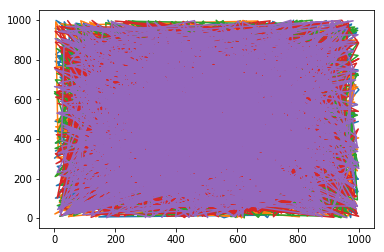

In [3]:
x = np.random.randint(1, 1000, (1000,5))
y = np.random.randint(1, 1000, (1000,5))
plt.plot(x,y)
plt.show

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
digits.data.shape[0]

1797

In [6]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [7]:
X, y = digits.data, digits.target

In [8]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
X.shape

(1797, 64)

In [11]:
some_digit = X[1010]
some_digit

array([ 0.,  0.,  9., 12., 12., 12.,  6.,  0.,  0.,  1., 14.,  6.,  4.,
        4.,  2.,  0.,  0.,  4., 15., 12.,  9.,  1.,  0.,  0.,  0.,  4.,
       15.,  8., 11., 11.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 14.,  4.,
        0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0., 10.,  1.,
        0.,  8.,  8.,  0.,  0.,  0.,  9., 16., 16., 15.,  4.,  0.])

In [12]:
some_digit_image = some_digit.reshape(8,8)

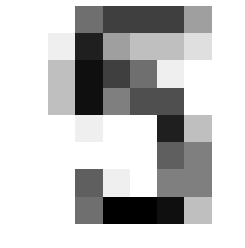

In [13]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

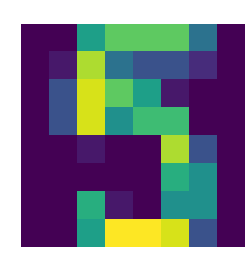

In [14]:
plt.matshow(some_digit_image)#, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

<Figure size 432x288 with 0 Axes>

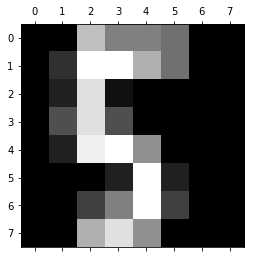

In [15]:
plt.gray() 
plt.matshow(digits.images[25]) 
plt.show()

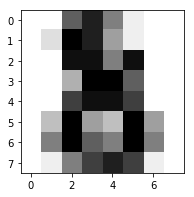

In [16]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [17]:
# from Hands on Machine Learning... by Aurélien Géron
mnist =  fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [18]:
X, y = mnist["data"], mnist["target"]
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [19]:
X.shape, y.shape

((70000, 784), (70000,))

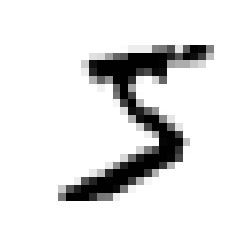

In [20]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [21]:
y = y.astype(np.uint8)
y[0]

5

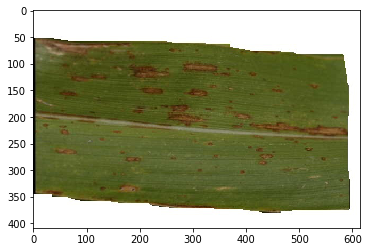

In [35]:
# just testing... image not needed
image = Image.open("leaf_smut_1.jpg")
plt.imshow(np.asarray(image))


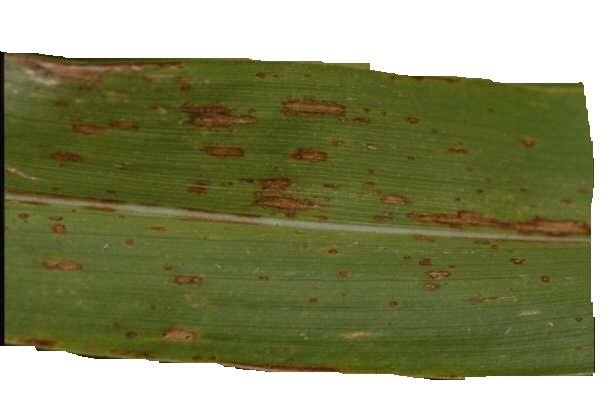

In [23]:
# https://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook
b = BytesIO()
image.save(b, format='png')
HTML("<img src='data:image/png;base64,{0}'/>".format(b64encode(b.getvalue()).decode('utf-8')))

In [24]:
X_train, X_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]

In [25]:
y_train_5 = (y_train == 5)
y_train_5

array([ True, False, False, ..., False, False, False])

In [26]:
y_test_5 = (y_test == 5)

In [31]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
# comparison using: https://datascience.stackexchange.com/questions/6676/scikit-learn-getting-sgdclassifier-to-predict-as-well-as-a-logistic-regression
def modelComparison():
    Models = [LogisticRegression, SGDClassifier]

    numFolds = 3
    kf = KFold(n_splits=numFolds, shuffle=False)
    params = [{}, {"loss":"log", "penalty":"12",'n_iter':1000}]

    for param, Model in zip(params, Models):
        total = 0

        for train_indices, test_indices in kf.split(X):
            train_X = X[train_indices,:]
            train_Y = y[train_indices]
            test_X = X[test_indices,:]
            test_Y = y[test_indices]

            reg = Model(**param)
            reg.fit(train_X, train_Y)
            predictions = reg.predict(test_X)
            total += accuracy_score(test_Y, predictions)

        accuracy = total/numFolds
        print("Accuracy score of {0}: {1}".format(Model.__name__, accuracy))

In [36]:
sgd_clf.predict([some_digit])

array([ True])

In [41]:
#roughly same  as cross_val_score but with more control
# Measuring using accuracy
skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.953023488255872
0.944
0.9644822411205602


In [40]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95302349, 0.944     , 0.96448224])

In [43]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [44]:
never_5_clf = Never5Classifier()

In [45]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91 , 0.915, 0.918])

In [52]:
# Confusion Matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [53]:
confusion_matrix(y_train_5, y_train_pred)

array([[5322,  164],
       [ 113,  401]], dtype=int64)

In [58]:
precision_score(y_train_5, y_train_pred)
# percent of corrent when classifies as 5

0.7097345132743362

In [59]:
recall_score(y_train_5, y_train_pred)
# detection rate of 5

0.7801556420233463

In [61]:
# F1 score (harmonic mean, only high if both recall and precision are high)
#(TP/(TP+((FN+FP)/2)))
f1_score(y_train_5, y_train_pred)

0.743280815569972